# Analyse Experiment - Overview

With pressure sensor parascientific and new speaer 

In [199]:
import os 
import obspy as obs
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from andbro__savefig import __savefig

In [9]:
config = {}

In [12]:
config['datapath_femto'] = "/home/andbro/Documents/ROMY/Scripps_Fiber/data/experiment6/"

config['datapath_mseed'] = "/home/andbro/Documents/ROMY/Scripps_Fiber/data/mseed/"

In [184]:
f_expected = {0:1.04, 1:0.1206, 2:0.1206, 3:0.1206, 4:0.1206, 6:1.0006, 7:1.0006, 8:0.5006, 9:2.0006, 10:10.0006}

## Load Data of Experiments

In [168]:
ex00 = obs.read(config['datapath_mseed']+"experiment0.mseed")
ex01 = obs.read(config['datapath_mseed']+"experiment1.mseed")
ex02 = obs.read(config['datapath_mseed']+"experiment2.mseed")
ex03 = obs.read(config['datapath_mseed']+"experiment3.mseed")
ex04 = obs.read(config['datapath_mseed']+"experiment4.mseed")
ex06 = obs.read(config['datapath_mseed']+"experiment6.mseed")
ex07 = obs.read(config['datapath_mseed']+"experiment7.mseed")
ex08 = obs.read(config['datapath_mseed']+"experiment8.mseed")
ex09 = obs.read(config['datapath_mseed']+"experiment9.mseed")
ex10 = obs.read(config['datapath_mseed']+"experiment10.mseed")

In [169]:
streams = {}
for i in range(0,11):
    if i == 5:
        continue
    streams[i] = obs.read(config['datapath_mseed']+f"experiment{i}.mseed")

In [172]:
from scipy.signal import welch, hann

psds = {}
for i in range(0,11):
    if i == 5:
        continue

    signal = streams[i][0]
#     signal.detrend("linear")

    nblock =  512*10
    overlap = None
    # window = hann(int(nblock))

    f, Pxx = welch(signal, fs=trace.stats.sampling_rate, 
                    window='hann', noverlap=overlap, nperseg=nblock,
                    scaling="density",
                    return_onesided=True)

    psds[i] = [f, Pxx]


   -> saving /home/andbro/Documents/ROMY/Scripps_Fiber/LaserPressure_ExAll.png ...

   -> Done



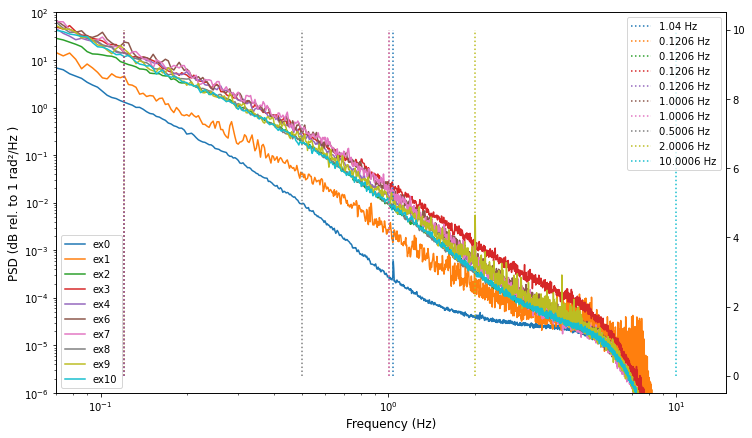

In [202]:
font = 12

fig, ax = plt.subplots(1,1,figsize=(12,7))

ax2 = ax.twinx()


for n, i in enumerate(streams.keys()):
    
    f, psd = psds[i][0], psds[i][1]
    
#     ax.semilogx(f, psd)
    l = ax.loglog(f, psd, label=f"ex{i}")

    ax2.vlines(f_expected[i], min(psds), max(psds), color=l[0].get_color(), ls=":", 
               alpha=1, zorder=0, label=f"{f_expected[i]} Hz")

    ax.set_ylim(bottom=1e-6, top=1e2)
    ax.set_xlim(left=7e-2)
    
    ax.legend(loc=3)
    ax2.legend(loc=1)

    ax.set_xlabel("Frequency (Hz)", fontsize=font)
    ax.set_ylabel("PSD (dB rel. to 1 rad²/Hz )", fontsize=font)

__savefig(fig, outpath="/home/andbro/Documents/ROMY/Scripps_Fiber/", outname="LaserPressure_ExAll", mode="png", dpi=300)


   -> saving /home/andbro/Documents/ROMY/Scripps_Fiber/LaserPressure_Ex0andEx1.png ...

   -> Done



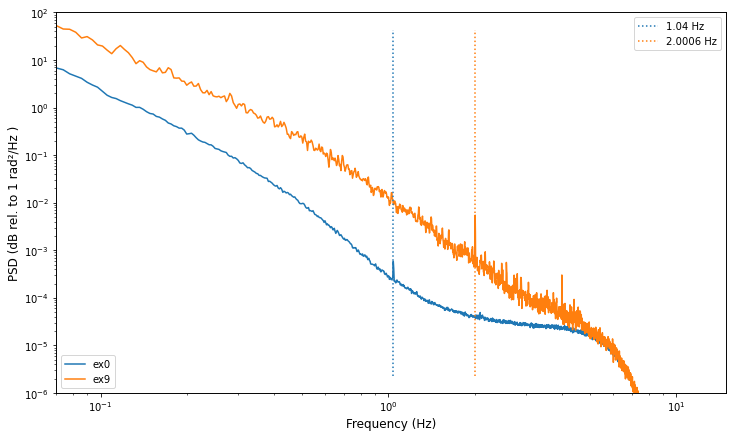

In [201]:
font = 12

fig, ax = plt.subplots(1,1,figsize=(12,7))

ax2 = ax.twinx()
ax2.get_yaxis().set_visible(False)

for n, i in enumerate([0,9]):
    
    f, psd = psds[i][0], psds[i][1]
    
#     ax.semilogx(f, psd)
    l = ax.loglog(f, psd, label=f"ex{i}")

    ax2.vlines(f_expected[i], min(psds), max(psds), color=l[0].get_color(), ls=":", 
               alpha=1, zorder=0, label=f"{f_expected[i]} Hz")

    ax.set_ylim(bottom=1e-6, top=1e2)
    ax.set_xlim(left=7e-2)
    
    ax.legend(loc=3)
    ax2.legend(loc=1)

    ax.set_xlabel("Frequency (Hz)", fontsize=font)
    ax.set_ylabel("PSD (dB rel. to 1 rad²/Hz )", fontsize=font)
    
# __savefig(fig, outpath="/home/andbro/Documents/ROMY/Scripps_Fiber/", outname="LaserPressure_Ex0andEx1", mode="png", dpi=300)

In [101]:
def __plot_psd(trace):

    from scipy.signal import welch, hann


    signal = trace.data 
    
    nblock =  512*4
    overlap = None
    # window = hann(int(nblock))

    f, Pxx = welch(signal, fs=trace.stats.sampling_rate, 
                    window='hann', noverlap=overlap, nperseg=nblock,
                    scaling="density",
                    return_onesided=True)

    ## normalize
    Pxx /= nblock
    
    Pxx /= max(Pxx)
    Pxx = 10*np.log10(Pxx)

    
    ## ------------------------

    font = 12

    fig, ax = plt.subplots(1,2,figsize=(15,5))

    tx = np.linspace(0, trace.stats.npts/trace.stats.sampling_rate/3600, trace.stats.npts)
    ax[0].plot(tx, signal)

    ax[1].vlines(0.120, min(Pxx), max(Pxx), color="grey", ls="--", alpha=1, zorder=0)
    ax[1].semilogx(f, Pxx)
#     ax[1].loglog(f, Pxx)

#     ax[1].set_ylim(-80,5)
#     ax[1].set_xlim(1e-3,5)

    ax[0].set_xlabel("Time (hours)", fontsize=font)
    ax[1].set_xlabel("Frequency (Hz)", fontsize=font)
    ax[0].set_ylabel("norm. Amplitude (kPa)", fontsize=font)
    ax[1].set_ylabel("PSD (dB rel. to 1 kPa²/Hz )", fontsize=font)

    plt.show();

In [102]:
# for i in range(1,11):
#     if i == 5:
#         continue
    
#     trace = streams[i][0]
# #     trace.detrend("linear")
    
#     __plot_psd(trace)